# Importing Libraries & Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("election2024.csv")
df

,id,sex,age,federal_district,type_of_city,knows_election_date,will_vote,candidate,television_usage,internet_usage,education,income,employment,job_type,company_type,weight1
0,07169ed8148ce047,male,18.0,north caucasian,village,named correct date,not sure,Putin,several times a week,over 4 hours a day,incomplete school education,very high,entrepreneur,NaN,farming,1.445172
1,0716a4f3354cecdd,male,23.0,north caucasian,village,named correct date,not sure,Putin,once half a year,over 4 hours a day,college,very high,work for hire,commercial organization,trade,1.445172
2,0716889b304ce79c,male,20.0,volga,city with population of less than 50k,named correct date,definitely yes,Putin,several times a week,over 4 hours a day,college,very high,work for hire,law enforcement agency,law enforcement agency,1.301691
3,07168e28b5cce563,male,22.0,northwestern,city with population of 1 million and higher,not sure or no answer,not sure,Davankov,several times a week,over 4 hours a day,college,very high,unemployed,NaN,NaN,1.538628
4,0716a563914ce549,male,21.0,southern,city with population of 1 million and higher,named correct date,definitely yes,Putin,does not watch,over 4 hours a day,bachelor degree,very high,employed student,commercial organization,"tech, programming, communications",1.967015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,0716b23c2c0cee3a,male,61.0,central,settlement,named correct date,definitely no,will not take part,over 4 hours a day,less than 4 hours a day,bachelor degree,hard to say,unemployed pensioner,NaN,NaN,1.270761
1596,07168254d14ceb55,female,80.0,volga,village,named correct date,likely yes,struggle to answer,several times a week,does not use internet,college,hard to say,unemployed pensioner,NaN,NaN,0.921724
1597,071690f34d4ce164,female,76.0,northwestern,city with population of 50-100k,named correct date,definitely yes,Putin,does not watch,over 4 hours a day,bachelor degree,hard to say,unemployed pensioner,NaN,NaN,1.396691
1598,0716bfa9c48ce79a,female,74.0,central,city with population of less than 50k,not sure or no answer,definitely yes,Putin,over 4 hours a day,over 4 hours a day,academic degree,hard to say,employed pensioner,commercial organization,"industry, manufacturing",0.995849


# Data Pre-Processing

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600 entries, 0 to 1599
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   1600 non-null   object 
 1   sex                  1600 non-null   object 
 2   age                  1600 non-null   float64
 3   federal_district     1600 non-null   object 
 4   type_of_city         1600 non-null   object 
 5   knows_election_date  1600 non-null   object 
 6   will_vote            1600 non-null   object 
 7   candidate            1600 non-null   object 
 8   television_usage     1600 non-null   object 
 9   internet_usage       1600 non-null   object 
 10  education            1600 non-null   object 
 11  income               1600 non-null   object 
 12  employment           1600 non-null   object 
 13  job_type             692 non-null    object 
 14  company_type         879 non-null    object 
 15  weight1              1600 non-null   f

In [4]:
df.isnull().sum()

id                       0
sex                      0
age                      0
federal_district         0
type_of_city             0
knows_election_date      0
will_vote                0
candidate                0
television_usage         0
internet_usage           0
education                0
income                   0
employment               0
job_type               908
company_type           721
weight1                  0
dtype: int64

In [5]:
df["job_type"].value_counts()

job_type
commercial organization                    445
government agency                          163
law enforcement agency                      33
non-profit agency                           22
hard to say                                 22
government, management, judicial bodies      7
Name: count, dtype: int64

In [6]:
df["job_type"].fillna("Other",inplace=True)

In [7]:
df["job_type"].value_counts()

job_type
Other                                      908
commercial organization                    445
government agency                          163
law enforcement agency                      33
non-profit agency                           22
hard to say                                 22
government, management, judicial bodies      7
Name: count, dtype: int64

In [8]:
df["company_type"].value_counts()

company_type
industry, manufacturing                                                                                                     138
trade                                                                                                                       113
education                                                                                                                    85
Сфера услуг, сервиса, бытового обслуживания Включает в том числе: Прачечная/химчистка, ремонт мебели, часов, ювелирны...     70
construction, architecture                                                                                                   67
transportation, storage                                                                                                      51
farming                                                                                                                      44
law enforcement agency                                                                     

In [9]:
df["company_type"].fillna("Other",inplace=True)

In [10]:
df["company_type"].value_counts()

company_type
Other                                                                                                                       721
industry, manufacturing                                                                                                     138
trade                                                                                                                       113
education                                                                                                                    85
Сфера услуг, сервиса, бытового обслуживания Включает в том числе: Прачечная/химчистка, ремонт мебели, часов, ювелирны...     70
construction, architecture                                                                                                   67
transportation, storage                                                                                                      51
farming                                                                                    

- Since the unknown values were much larger as compared to other values, so simply made one more kind of value named as other i.e. unknown.

In [11]:
df.isnull().sum()

id                     0
sex                    0
age                    0
federal_district       0
type_of_city           0
knows_election_date    0
will_vote              0
candidate              0
television_usage       0
internet_usage         0
education              0
income                 0
employment             0
job_type               0
company_type           0
weight1                0
dtype: int64

- No null values are in dataset

In [12]:
#Check for Duplicates
df.duplicated().sum()

0

- No duplicates in the Dataset.

In [13]:
df.head()

,id,sex,age,federal_district,type_of_city,knows_election_date,will_vote,candidate,television_usage,internet_usage,education,income,employment,job_type,company_type,weight1
0,07169ed8148ce047,male,18.0,north caucasian,village,named correct date,not sure,Putin,several times a week,over 4 hours a day,incomplete school education,very high,entrepreneur,Other,farming,1.445172
1,0716a4f3354cecdd,male,23.0,north caucasian,village,named correct date,not sure,Putin,once half a year,over 4 hours a day,college,very high,work for hire,commercial organization,trade,1.445172
2,0716889b304ce79c,male,20.0,volga,city with population of less than 50k,named correct date,definitely yes,Putin,several times a week,over 4 hours a day,college,very high,work for hire,law enforcement agency,law enforcement agency,1.301691
3,07168e28b5cce563,male,22.0,northwestern,city with population of 1 million and higher,not sure or no answer,not sure,Davankov,several times a week,over 4 hours a day,college,very high,unemployed,Other,Other,1.538628
4,0716a563914ce549,male,21.0,southern,city with population of 1 million and higher,named correct date,definitely yes,Putin,does not watch,over 4 hours a day,bachelor degree,very high,employed student,commercial organization,"tech, programming, communications",1.967015


- As id columns is that important, Drop it.

In [14]:
df.drop("id",axis=1,inplace=True)

In [15]:
df.head(5)

,sex,age,federal_district,type_of_city,knows_election_date,will_vote,candidate,television_usage,internet_usage,education,income,employment,job_type,company_type,weight1
0,male,18.0,north caucasian,village,named correct date,not sure,Putin,several times a week,over 4 hours a day,incomplete school education,very high,entrepreneur,Other,farming,1.445172
1,male,23.0,north caucasian,village,named correct date,not sure,Putin,once half a year,over 4 hours a day,college,very high,work for hire,commercial organization,trade,1.445172
2,male,20.0,volga,city with population of less than 50k,named correct date,definitely yes,Putin,several times a week,over 4 hours a day,college,very high,work for hire,law enforcement agency,law enforcement agency,1.301691
3,male,22.0,northwestern,city with population of 1 million and higher,not sure or no answer,not sure,Davankov,several times a week,over 4 hours a day,college,very high,unemployed,Other,Other,1.538628
4,male,21.0,southern,city with population of 1 million and higher,named correct date,definitely yes,Putin,does not watch,over 4 hours a day,bachelor degree,very high,employed student,commercial organization,"tech, programming, communications",1.967015


# Exploratory Data Analysis(EDA)

In [16]:
df["sex"].value_counts()

sex
female    843
male      757
Name: count, dtype: int64

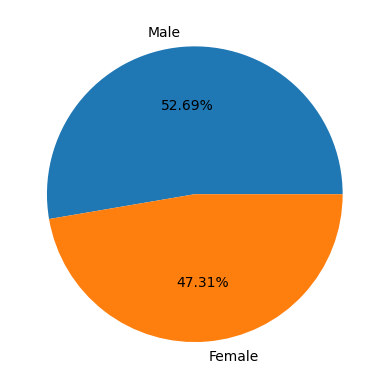

In [17]:
#pie chart
plt.pie(df["sex"].value_counts(),labels=["Male","Female"],autopct="%0.2f%%")
plt.show()

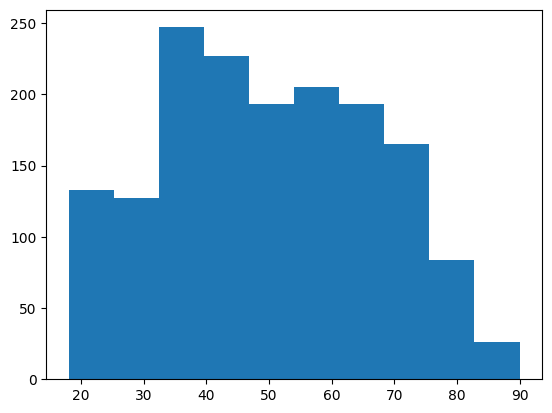

In [18]:
plt.hist(df["age"])
plt.show()

In [19]:
df["age"].describe()

count    1600.000000
mean       49.936250
std        16.901797
min        18.000000
25%        37.000000
50%        49.000000
75%        64.000000
max        90.000000
Name: age, dtype: float64

- As per the fact that minimum age in russia to vote is 18 as well as our age distribution is too between 18 and 90 we can say the all of the citizens in the dataset are eligible to vote.

In [20]:
df.head(2)

,sex,age,federal_district,type_of_city,knows_election_date,will_vote,candidate,television_usage,internet_usage,education,income,employment,job_type,company_type,weight1
0,male,18.0,north caucasian,village,named correct date,not sure,Putin,several times a week,over 4 hours a day,incomplete school education,very high,entrepreneur,Other,farming,1.445172
1,male,23.0,north caucasian,village,named correct date,not sure,Putin,once half a year,over 4 hours a day,college,very high,work for hire,commercial organization,trade,1.445172


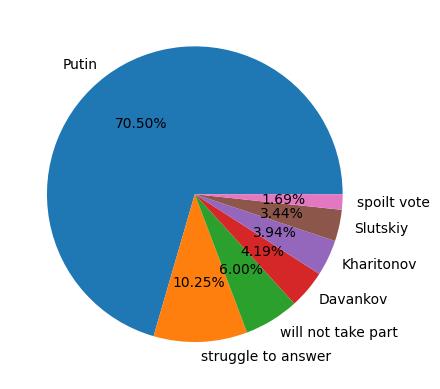

In [21]:
plt.pie(df["candidate"].value_counts(),labels=df["candidate"].value_counts().index,autopct="%0.2f%%")
plt.show()

In [22]:
df["candidate"].value_counts()

candidate
Putin                 1128
struggle to answer     164
will not take part      96
Davankov                67
Kharitonov              63
Slutskiy                55
spoilt vote             27
Name: count, dtype: int64

- 70% voters are in favour of Putin,while 16.25% are still not disclosed i.e."struggle to answer" & "will not take part".

In [23]:
#Let's check Voting situation
df["will_vote"].value_counts()

will_vote
definitely yes        1062
likely yes             218
not sure               166
definitely no           86
likely no               55
struggle to answer      13
Name: count, dtype: int64

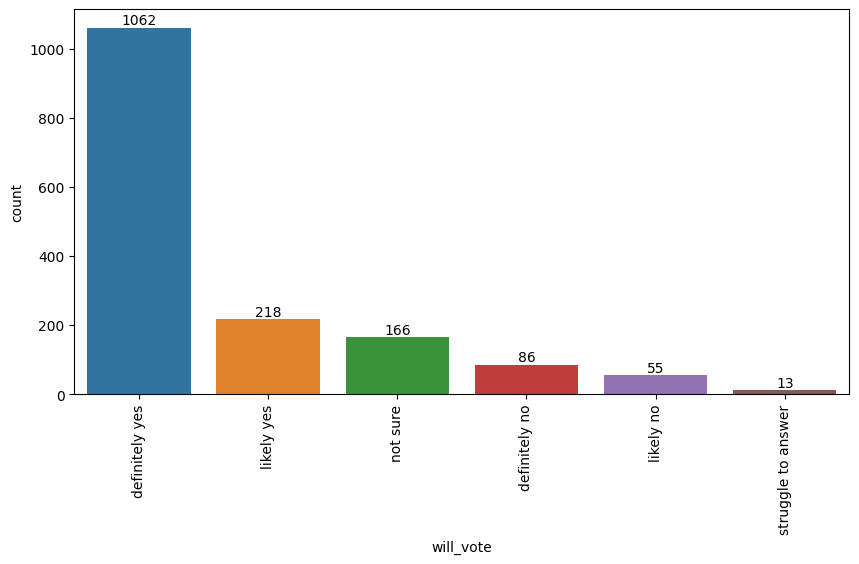

In [24]:
plt.figure(figsize=(10, 5))
#df = your_dataframe_here  # Assign your DataFrame to the variable df

sns.barplot(x=df["will_vote"].value_counts().index, y=df["will_vote"].value_counts(),hue=df["will_vote"].value_counts().index)
plt.xticks(rotation=90)

for i, count in enumerate(df["will_vote"].value_counts()):
    plt.text(i, count, str(count), ha="center", va="bottom")

plt.show()

- As per the above barplot, 1016 around 70% people are sure to vote if we include likely yes too, there are around 80% voter who are sure to vote.

- Let's cosider these voters to for a conclusion:

In [25]:
df_vote=df[(df["will_vote"] == "definitely yes") | (df["will_vote"] == "likely yes")]
df_vote

,sex,age,federal_district,type_of_city,knows_election_date,will_vote,candidate,television_usage,internet_usage,education,income,employment,job_type,company_type,weight1
2,male,20.0,volga,city with population of less than 50k,named correct date,definitely yes,Putin,several times a week,over 4 hours a day,college,very high,work for hire,law enforcement agency,law enforcement agency,1.301691
4,male,21.0,southern,city with population of 1 million and higher,named correct date,definitely yes,Putin,does not watch,over 4 hours a day,bachelor degree,very high,employed student,commercial organization,"tech, programming, communications",1.967015
6,male,37.0,northwestern,city with population of less than 50k,named correct date,definitely yes,Putin,once half a year,several times a week,school,very high,work for hire,commercial organization,"industry, manufacturing",0.579384
7,male,43.0,southern,city with population of 50-100k,named correct date,definitely yes,Putin,does not watch,less than 4 hours a day,college,very high,self-employed,Other,other,0.662259
8,male,39.0,northwestern,city with population of 100-500k,wrong answer,definitely yes,Putin,does not watch,over 4 hours a day,college,very high,unemployed pensioner,Other,Other,0.468226
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,male,51.0,north caucasian,city with population of 500-950k,named correct date,likely yes,Putin,several times a week,several times a week,bachelor degree,hard to say,unemployed,Other,Other,0.928472
1596,female,80.0,volga,village,named correct date,likely yes,struggle to answer,several times a week,does not use internet,college,hard to say,unemployed pensioner,Other,Other,0.921724
1597,female,76.0,northwestern,city with population of 50-100k,named correct date,definitely yes,Putin,does not watch,over 4 hours a day,bachelor degree,hard to say,unemployed pensioner,Other,Other,1.396691
1598,female,74.0,central,city with population of less than 50k,not sure or no answer,definitely yes,Putin,over 4 hours a day,over 4 hours a day,academic degree,hard to say,employed pensioner,commercial organization,"industry, manufacturing",0.995849


In [26]:
df_vote["candidate"].value_counts()

candidate
Putin                 981
struggle to answer    119
Davankov               60
Kharitonov             44
Slutskiy               43
spoilt vote            24
will not take part      9
Name: count, dtype: int64

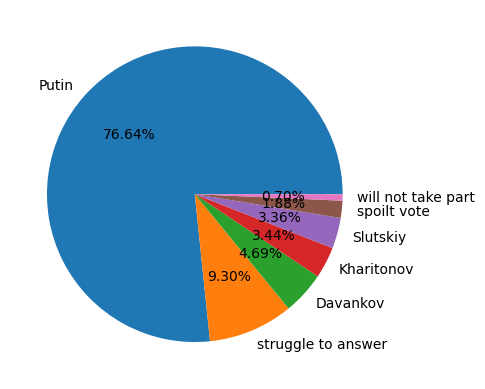

In [27]:
plt.pie(df_vote["candidate"].value_counts(),labels=df_vote["candidate"].value_counts().index,autopct="%0.2f%%")
plt.show()

- Even in those who are sure and like yes voters, there are even increase for putin by 76%. Hence we can say that Putin is far more likely to win.
- On the other hand opponent leaders like "Davamkov","Kharitonov", "Slutskiy" etc. not even close to putin.
- If we consider other factors like those who "struggle to answer" and "will not take part" then too putin is far more ahead of all.

In [28]:
df.columns

Index(['sex', 'age', 'federal_district', 'type_of_city', 'knows_election_date',
       'will_vote', 'candidate', 'television_usage', 'internet_usage',
       'education', 'income', 'employment', 'job_type', 'company_type',
       'weight1'],
      dtype='object')

federal_district


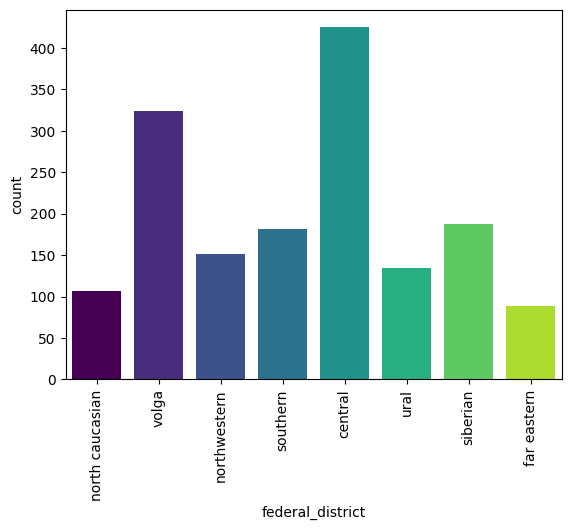

In [29]:
df["federal_district"].value_counts()
sns.countplot(x=df["federal_district"])
plt.xticks(rotation=90)
# Iterate over the bars and set different colors
for i, patch in enumerate(plt.gca().patches):
    patch.set_facecolor(plt.cm.viridis(i / len(plt.gca().patches)))

plt.show()

- Above federal districts are represented in the dataset
- Central and volga are two districts which are having more respondents in number.

#Conclusion:
There may be many more points to discuss but as per the poll elections are considered, Putin is Getting tremendous victory in "Presidential Election 2024" as per this poll.